In [1]:
import numpy as np
import pandas as pd
import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
%matplotlib inline


In [2]:
data = pd.read_csv("Wholesale customers data.csv")
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
data.drop('Channel',axis=1,inplace=True)
data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185


In [4]:
data['Region'].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [5]:
data.isnull().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
list(data.columns)

['Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

### Dissimilarity matrix computation

In [7]:
nominal_diss=np.zeros((data.shape[0],data.shape[0]))
nominal_diss.shape

(440, 440)

In [8]:
cnt=0
tot=0
for i in range(data.shape[0]):
    for j in range(i+1,data.shape[0]):
        if data.iloc[i,0]==data.iloc[j,0]:
            nominal_diss[j][i]=1
nominal_diss

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 1., 0., 0.],
       [1., 1., 1., ..., 1., 1., 0.]])

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
regions=data['Region']
data.drop('Region',axis=1,inplace=True)
data=scaler.fit_transform(data)
data = pd.DataFrame(data,columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])
f=data["Fresh"].tolist()
ma=data["Milk"].tolist()
g=data["Grocery"].tolist()
fz=data["Frozen"].tolist()
dp=data["Detergents_Paper"].tolist()
de=data["Delicassen"].tolist()
diss_N= np.zeros((data.shape[0],data.shape[0]))
m,n=data.shape
for i in range(len(f)):
  p1=(f[i],ma[i],g[i],fz[i],dp[i],de[i])
  for j in range(i+1,len(f)):
    p2=(f[j],ma[j],g[j],fz[j],dp[j],de[j])
    diss_N[j][i]=dist.euclidean(p1, p2)

In [10]:
diss_N

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.62085789, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [2.41519574, 2.1728031 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [3.5946627 , 3.41213198, 4.14847212, ..., 0.        , 0.        ,
        0.        ],
       [1.3484613 , 1.50293179, 2.44544539, ..., 4.65765286, 0.        ,
        0.        ],
       [1.57560318, 1.65064121, 3.09817358, ..., 4.73466988, 0.97011304,
        0.        ]])

In [11]:
dist=np.add(nominal_diss,diss_N)
dist=dist/2
dist

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.81042895, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.70759787, 1.58640155, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [2.29733135, 2.20606599, 2.57423606, ..., 0.        , 0.        ,
        0.        ],
       [1.17423065, 1.25146589, 1.7227227 , ..., 2.82882643, 0.        ,
        0.        ],
       [1.28780159, 1.32532061, 2.04908679, ..., 2.86733494, 0.98505652,
        0.        ]])

### Dissimilarity matrix computed for the given dataset (Upper triangular)

In [12]:
dist=pd.DataFrame(dist)
dist

,0,1,2,3,4,5,6,7,8,9,...,430,431,432,433,434,435,436,437,438,439
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.810429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,1.707598,1.586402,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,1.408988,1.392013,1.841633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
4,1.426841,1.461549,1.365083,1.330927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,2.095890,2.058796,2.355908,1.856594,1.807544,2.155382,2.219770,2.121640,2.312762,2.234924,...,2.251738,1.622283,2.200300,2.396369,2.082843,0.000000,0.000000,0.000000,0.000000,0.0
436,1.858683,2.037108,2.290211,1.567330,1.453409,1.868956,1.784225,1.927104,1.957562,2.444980,...,2.212798,2.082200,1.441431,2.019588,1.618284,1.948769,0.000000,0.000000,0.000000,0.0
437,2.297331,2.206066,2.574236,2.837603,2.597555,2.478337,2.441682,2.311809,2.574350,1.583658,...,2.414251,2.964374,2.712678,2.858760,2.435058,2.749910,3.118514,0.000000,0.000000,0.0
438,1.174231,1.251466,1.722723,1.081939,1.378648,1.000710,1.003829,1.061925,0.919043,1.826815,...,1.318660,1.827295,1.065490,0.866273,1.030490,2.272250,1.703718,2.828826,0.000000,0.0


## One hot encoding the categorical attribute - 'Region'

In [13]:
data = pd.read_csv("Wholesale customers data.csv")
data.drop('Channel',axis=1,inplace=True)
property_dummies = pd.get_dummies(data['Region'], prefix='Region')
data = pd.concat([data, property_dummies], axis=1)
data.drop('Region',axis=1,inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,0,1
1,7057,9810,9568,1762,3293,1776,0,0,1
2,6353,8808,7684,2405,3516,7844,0,0,1
3,13265,1196,4221,6404,507,1788,0,0,1
4,22615,5410,7198,3915,1777,5185,0,0,1


## Scaling data (standardization)

In [14]:
data = scaler.fit_transform(data)
data = pd.DataFrame(data,columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen','Region_1','Region_2','Region_3'])

In [15]:
# To avoid dummy variable trap
data.drop('Region_3',axis=1,inplace=True)

In [16]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Region_1,Region_2
0,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,-0.460566,-0.345822
1,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,-0.460566,-0.345822
2,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,-0.460566,-0.345822
3,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.460566,-0.345822
4,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-0.460566,-0.345822


## Hierarchical clustering (Agglomerative)

In [17]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='complete')
cluster.fit_predict(data)
print(cluster.labels_)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 8 2 2 2 2 6 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 6 2 6 2 5 2 6 2 2 2 2 2 2 6 2 2 2 2 5 2 2 2 6 2 2 2 2 2 8 2 2
 2 2 2 6 2 2 2 2 2 2 2 9 5 8 2 2 2 2 6 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2
 2 2 2 2 2 2 2 6 2 2 2 2 2 2 2 6 2 2 2 2 2 2 2 6 2 6 2 2 2 2 2 2 2 1 2 7 2
 2 2 2 2 2 2 2 2 6 2 2 2 2 2 2 6 6 2 2 2 6 2 2 2 6 2 6 2 2 2 2 6 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3
 4 3 3 3 3 3 3 2 2 2 6 2 2 2 2 2 6 2 6 2 6 2 2 2 6 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2]


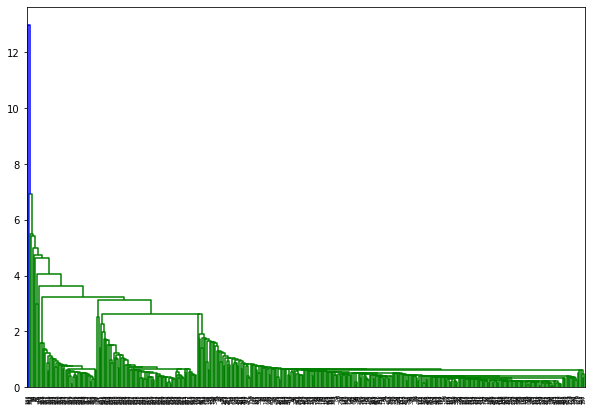

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
linked=linkage(data,'single')
plt.figure(figsize=(10,7))
dendrogram(linked,
          orientation='top',
          labels=list(range(data.shape[0])),
          distance_sort='descending',
          show_leaf_counts=True)
plt.show()

## Cophenetic correlation

In [19]:
c, coph_dists = cophenet(linked, pdist(data))
print(c)
print(coph_dists)

0.838965301935215
[0.52926893 1.2507466  0.52430279 ... 0.95858681 0.95858681 0.33742632]


## DBSCAN 

In [20]:
#data with one hot encoding

dbsc = DBSCAN(eps = 0.7, min_samples = 7).fit(data)

labels = dbsc.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(labels)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

[ 0  0 -1  0 -1  0  0  0  0 -1  0  0 -1 -1 -1  0  0 -1  0  0  0  0 -1 -1
 -1  0  0  0 -1  1  0  0  0 -1  0  0 -1 -1 -1 -1 -1  0  0 -1  0 -1 -1 -1
  0 -1  0  0  1  0  0  0 -1  0  0  0  0 -1  0 -1  0 -1  0  0  0  0  0 -1
 -1  0  0  0 -1 -1  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0 -1 -1  0  0
  0  0  0  0 -1  0  0 -1  0  0  0 -1  0 -1  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0 -1 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0
  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0
  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0  0 -1  0  0  0  0
  0 -1  0  0 -1  3  2  2 -1 -1 -1  2  2 -1  2  3  2 -1  2 -1  2  3  3 -1
 -1  2 -1  2  2  3  4  4  2  2 -1  2 -1  4 -1  2  2  2  2  2  2  2  2 -1
 -1  2  2  2  3 -1  2  2  2  4  2 -1  4 -1 -1  2  2 -1 -1 -1  2  4  2 -1
 -1 -1 -1 -1 -1  2  2  2  2 -1  0  0 -1 -1  0  0  0  0 -1  0 -1  1  0  0
  0  1  0  0  0 -1 -1  5 -1 -1 -1  5 -1 -1 -1 -1 -1 -1 -1  5  5 -1 -1 -1
 -1  5  5 -1  5 -1  5 -1  5  5  5  5 -1 -1  5  5 -1

In [21]:
dbsc = DBSCAN(eps = 1, min_samples = 7).fit(data)

labels = dbsc.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(labels)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

[ 0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1
 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0 -1  0 -1
  0 -1  0  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0 -1
  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0 -1 -1  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0 -1  1  1  1 -1 -1 -1  1  1 -1  1  1  1 -1  1 -1  1  1  1  1
 -1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1
 -1  1  1  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1  1
  1 -1  1  1 -1  1  1  1  1  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0  0
  0  0  0  0  0 -1  2  2  2  2  2  2  2 -1  2 -1 -1 -1 -1  2  2 -1  2 -1
 -1  2  2 -1  2  2  2 -1  2  2  2  2  2 -1  2  2  2

## After dimensionality reduction

In [22]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
data_reduced = pca.fit_transform(data) 
  
explained_variance = pca.explained_variance_ratio_ 
data_reduced[:5]

array([[ 0.19896039, -0.27300486],
       [ 0.44027785, -0.2985047 ],
       [ 0.81622152,  0.8456464 ],
       [-0.77096324,  0.6781748 ],
       [ 0.17228503,  1.30146249]])

In [23]:
explained_variance

array([0.33088351, 0.21311695])

In [24]:
data_r=pd.DataFrame(data_reduced,columns=['c1','c2'])
data_r.head()

,c1,c2
0,0.198960,-0.273005
1,0.440278,-0.298505
2,0.816222,0.845646
3,-0.770963,0.678175
4,0.172285,1.301462


### As the variance explained is very less, the results may not be reliable.
### PCA applied for visualization purpose alone

# HAC Visualization (Single linkage)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 8 2 2 2 2 6 2 2 2 2 2 2 2 2
 2 2 1 2 2 2 6 2 6 2 5 2 6 2 2 2 2 2 2 6 2 2 2 2 5 2 2 2 6 2 2 2 2 2 8 2 2
 2 2 2 6 2 2 2 2 2 2 2 9 5 8 2 2 2 2 6 0 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2
 2 2 2 2 2 2 2 6 2 2 2 2 2 2 2 6 2 2 2 2 2 2 2 6 2 6 2 2 2 2 2 2 2 1 2 7 2
 2 2 2 2 2 2 2 2 6 2 2 2 2 2 2 6 6 2 2 2 6 2 2 2 6 2 6 2 2 2 2 6 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 3 3 3 3 3
 4 3 3 3 3 3 3 2 2 2 6 2 2 2 2 2 6 2 6 2 6 2 2 2 6 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 6 2 2]


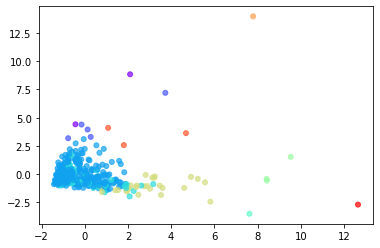

In [25]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=10,affinity='euclidean',linkage='complete')
cluster.fit_predict(data)
print(cluster.labels_)
plt.scatter(data_r['c1'],data_r['c2'],c=cluster.labels_,cmap='rainbow',s=25,alpha=0.7)
plt.show()

[[1.50000000e+01 2.80000000e+02 7.72846912e-03 2.00000000e+00]
 [4.10000000e+01 6.80000000e+01 8.06955740e-03 2.00000000e+00]
 [1.35000000e+02 1.99000000e+02 8.42324099e-03 2.00000000e+00]
 ...
 [8.73000000e+02 8.75000000e+02 3.69047709e+00 4.38000000e+02]
 [8.50000000e+01 8.76000000e+02 4.72512254e+00 4.39000000e+02]
 [1.83000000e+02 8.77000000e+02 7.66393899e+00 4.40000000e+02]]


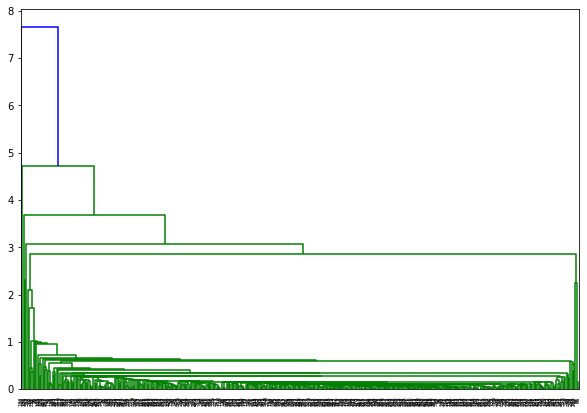

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked=linkage(data_reduced,'single')
print(linked)
plt.figure(figsize=(10,7))
dendrogram(linked,
          orientation='top',
          labels=list(range(data.shape[0])),
          distance_sort='descending',
          show_leaf_counts=True)
plt.show()

## Cophenetic correlation

In [27]:
c, coph_dists = cophenet(linked, pdist(data_reduced))
print(c)
print(coph_dists)

0.8790779432188711
[0.12335174 0.26899993 0.16113585 ... 0.3315776  0.3315776  0.1104905 ]


# DBSCAN Clustering Visualization

In [28]:
#data reduced to two dimensions for easier visualization
dbsc = DBSCAN(eps = 0.2, min_samples = 5).fit(data_reduced)

labels = dbsc.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print(labels)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

[ 0  0 -1  0 -1  0  0  0  0  2  0  0 -1  0 -1  0  0  0 -1  0  0  0 -1 -1
 -1  0  0  0 -1  0  0  0  0  1  0 -1  1 -1 -1 -1 -1  0  0 -1  0 -1  3 -1
  0 -1  0  0  1  0  0  0 -1  0  0  0  0 -1  0  2  0 -1 -1  0  0  0  0 -1
  0  1  0  0  0 -1  0  0  0 -1  0  0  0 -1 -1 -1  0  1  0  0 -1 -1  0  0
 -1  0  0  0 -1 -1  0 -1  0  0  0  2  0  3  0  2  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  1  0
  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0  0 -1  0 -1  0  0
  0  0  0 -1  0 -1  0  0 -1  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0
  0  0  0  1 -1  0  0  0 -1 -1 -1  0  0 -1  0  0  0 -1  0 -1  0  0  0 -1
 -1  0 -1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0 -1
 -1  0  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0  0 -1 -1  0  0  0  0
  0 -1  2  0  0  0  0  0  0  0  0  0  1 -1  0  0  0  0 -1  0 -1  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  3  0 -1 -1  0  3  0  0  3  0  0
 -1  0  0 -1  0  0  0 -1  0  0  0  0  0 -1  0  0  0

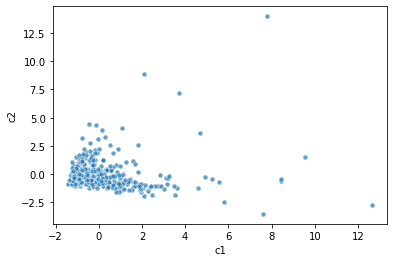

In [29]:
sns.scatterplot(data_r['c1'],data_r['c2'],s=25,alpha=0.7)
plt.show()

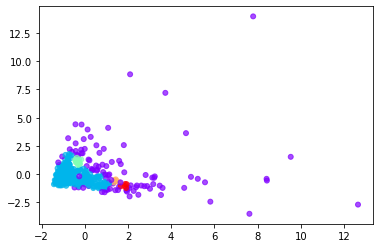

In [30]:
plt.scatter(data_r['c1'],data_r['c2'],c=labels,cmap='rainbow',s=25,alpha=0.7)
plt.show()